In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('iris-data-clean.csv')
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset['class'] = dataset['class'].replace('Iris-setosa', 0)
dataset['class'] = dataset['class'].replace('Iris-versicolor', 1)
dataset['class'] = dataset['class'].replace('Iris-virginica', 2)
dataset['class'].astype('int')

x = dataset.iloc[:, [0, 1]].values
x2 = dataset.iloc[:, [2, 3]].values

y = dataset.iloc[:, 4].values

In [ ]:
dataset

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,2.3,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
classifier.fit(x_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)
y_pred2 = classifier.predict(x_test2)
print(y_pred2)

[0 1 0 0 2 2 2 1 0 2 2 1 0 2 1 0 2 1 2 2 2 1 2 2 1 1 1 2 2 2 2 0 1 1 2 0 1
 0]
[2 2 1 1 0 2 2 1 1 1 0 0 1 0 0 1 2 1 0 0 0 0 1 0 1 1 1 0 0 2 0 1 1 2 0 1 2
 1]


In [ ]:
print(y_test)
print(y_test2)

[2 2 1 1 0 2 2 1 2 1 0 0 1 0 0 2 2 1 0 0 0 0 1 0 1 1 1 0 0 2 0 1 1 1 0 2 2
 1]
[2 2 1 1 0 2 2 1 2 1 0 0 1 0 0 2 2 1 0 0 0 0 1 0 1 1 1 0 0 2 0 1 1 1 0 2 2
 1]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[ 0  3 11]
 [ 5  7  2]
 [ 4  2  4]]
[[14  0  0]
 [ 0 13  1]
 [ 0  3  7]]


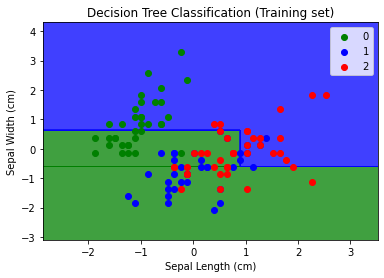

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

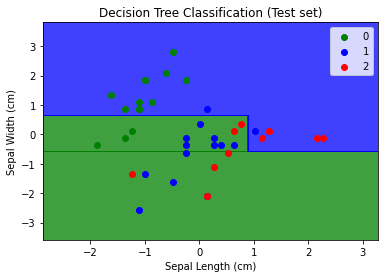

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

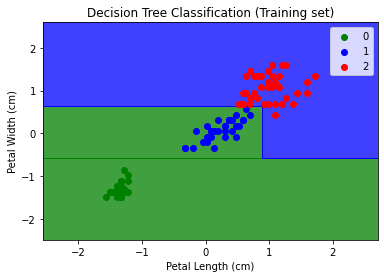

In [ ]:
from matplotlib.colors import ListedColormap
X_set2, y_set2 = x_train2, y_train2
X1, X2 = np.meshgrid(np.arange(start = X_set2[:, 0].min() - 1, stop = X_set2[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set2[:, 1].min() - 1, stop = X_set2[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

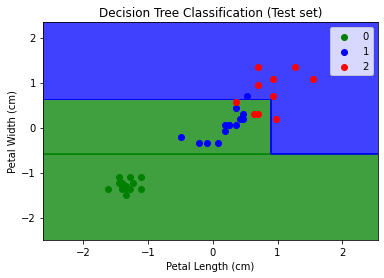

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set2, y_set2 = x_test2, y_test2
X1, X2 = np.meshgrid(np.arange(start = X_set2[:, 0].min() - 1, stop = X_set2[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set2[:, 1].min() - 1, stop = X_set2[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()